# Applying Prophet Algorithm to time series forecasting of Well and Riser flow rates

## Author: Ridha Alkhabaz

This is notebook to explore Prophet algorithm viability to predict volume flow rates in a well. Specifically, we are investigating oil volume flow rate in this notebook. 


## Imports:

In [2]:
import os
os.chdir('/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML/src')
from preprocessing import read_data_well, dataframe
os.chdir("/Users/ridhaalkhabaz/Documents/GitHub/VFM_ML")
from main import model_init, model_train, model_predict
import sys
import json
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import array
from sklearn.metrics import mean_squared_error as mse
import datetime as dttm

Importing plotly failed. Interactive plots will not work.


#### Reading the data and visualization:
We use the previous operation period to predict the fifth and final one. 

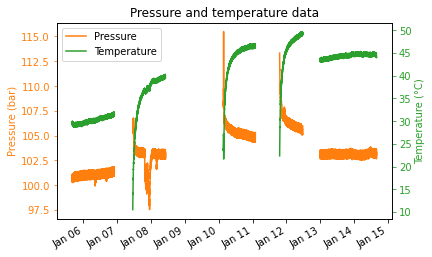

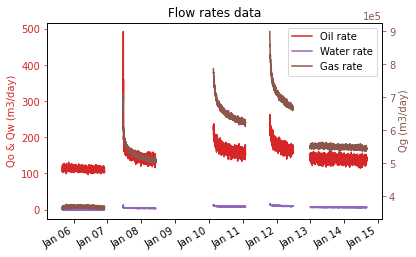

In [3]:
fp, headers, _ = read_data_well('welltest.csv', plot_data=True)
df_pd = dataframe(fp, ['ds', 'pressure', 'temperature', 'oil', 'water', 'gas'], True, True)
df = dataframe(fp, ['ds', 'pressure', 'temperature', 'oil', 'water', 'gas'], False, True)
train_mult = df.iloc[:5535]
test_mult = df.iloc[5535:]
train_mult_pd = df_pd.iloc[:10560]
test_mult_pd = df_pd.iloc[10560:]

#### Initialization:
We are trying to find the difference between univariate, multivairate, tuned and basic implementation of TCN. 

In [4]:
prop_oil_basic_mult = model_init(model='Prophet', params=['pressure', 'temperature'])
prop_oil_tuned_mult = model_init(model='Prophet', params=['pressure', 'temperature'], hyperparameters={'daily_seasonality':False,'weekly_seasonality':False, 'yearly_seasonality':True, \
                                     'changepoint_prior_scale':0.001, 'seasonality_prior_scale':0.01, \
                                     'holidays_prior_scale':0.01, 'seasonality_mode':'multiplicative'}, basic=False).add_seasonality(name='hourly', period=110, fourier_order=3)
prop_oil_basic_mult_pd = model_init(model='Prophet', params=['pressure', 'temperature'])
prop_oil_tuned_mult_pd = model_init(model='Prophet', params=['pressure', 'temperature'], hyperparameters={'daily_seasonality':False,'weekly_seasonality':False, 'yearly_seasonality':True, \
                                     'changepoint_prior_scale':0.001, 'seasonality_prior_scale':0.01, \
                                     'holidays_prior_scale':0.01, 'seasonality_mode':'multiplicative'}, basic=False).add_seasonality(name='hourly', period=110, fourier_order=3)

#### Curve-fitting:
we fit our data to our model.

In [5]:
trained_prop_oil_mult_basic = model_train(train_mult,prop_oil_basic_mult, 'Prophet')
trained_prop_oil_mult_tuned = model_train(train_mult,prop_oil_tuned_mult, 'Prophet')
trained_prop_oil_mult_basic_pd = model_train(train_mult_pd,prop_oil_basic_mult_pd, 'Prophet')
trained_prop_oil_mult_tuned_pd = model_train(train_mult_pd,prop_oil_tuned_mult_pd, 'Prophet')

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


#### Testing and visualization:
Here we use the testing data to find Prophet accuracy. 

In [6]:
prediction_data_oil_mult_basic, mse_oil_mult_basic = model_predict(test_mult, 'Prophet', trained_prop_oil_mult_basic, 'oil')
prediction_data_oil_mult_basic['time'] = range(0, len(test_mult))
prediction_data_oil_mult_tuned, mse_oil_mult_tuned = model_predict(test_mult, 'Prophet', trained_prop_oil_mult_tuned, 'oil')
prediction_data_oil_mult_tuned['time'] = range(0, len(test_mult))
prediction_data_oil_mult_basic_pd, mse_oil_mult_basic_pd = model_predict(test_mult_pd, 'Prophet', trained_prop_oil_mult_basic_pd, 'oil')
prediction_data_oil_mult_basic_pd['time'] = range(0, len(test_mult))
prediction_data_oil_mult_tuned_pd, mse_oil_mult_tuned_pd = model_predict(test_mult_pd, 'Prophet', trained_prop_oil_mult_tuned_pd, 'oil')
prediction_data_oil_mult_tuned_pd['time'] = range(0, len(test_mult))
test_mult['time'] = range(0, len(test_mult))

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
start_ploting = 0
end_ploting = 300
fig,ax = plt.subplots()
ax.set_title('oil flow rates')
ax.plot(test_mult['time'].iloc[start_ploting:end_ploting], test_mult['oil'].iloc[start_ploting:end_ploting], marker=".", label='oil_real_data')
ax.plot(prediction_data_oil_mult_basic['time'].iloc[start_ploting:end_ploting], prediction_data_oil_mult_basic['yhat'].iloc[start_ploting:end_ploting], marker="o", label='oil_prediction_prophet_mult_basic')
ax.plot(prediction_data_oil_mult_tuned['time'].iloc[start_ploting:end_ploting], prediction_data_oil_mult_tuned['yhat'].iloc[start_ploting:end_ploting], marker="o", label='oil_prediction_prophet_mult_tuned')
ax.plot(prediction_data_oil_mult_basic_pd['time'].iloc[start_ploting:end_ploting], prediction_data_oil_mult_basic_pd['yhat'].iloc[start_ploting:end_ploting], marker="o", label='oil_prediction_prophet_mult_basic_pd')
ax.plot(prediction_data_oil_mult_tuned_pd['time'].iloc[start_ploting:end_ploting], prediction_data_oil_mult_tuned_pd['yhat'].iloc[start_ploting:end_ploting], marker="o", label='oil_prediction_prophet_mult_tuned_pd')
ax.legend(loc='upper right')
# fig.savefig('riser-prophet-results.jpeg')